# Ratemaps

*Imports and data_folder access*

In [319]:
import pickle
import numpy as np
from pathlib import Path
import glob
import pandas as pd
import matplotlib.pyplot as plt

# switch the path to represent the correct directory when switching devices and fetch the latest repo from github
# Marc_PC
data_folder_1 = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")
data_folder_2 = Path(r"Z:\davide\2p_data\441394_ribolla")
data_folder_3 = Path(r"Z:\davide\2p_data\441406_fiano")

# Amber_laptop
#data_folder_1 = Path(r"C:\Users\renek\OneDrive\Documenten\Marc Studiemap\Master Internship 1\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")
#data_folder_2 = Path(r"Z:\davide\2p_data\441394_ribolla")
#data_folder_3 = Path(r"Z:\davide\2p_data\441406_fiano")

In [320]:
# Path to where the data is on your machine.
data_path_1 = data_folder_1.joinpath('20230211')

# ribolla files
data_path_2 = data_folder_2.joinpath('20230315')
data_path_3 = data_folder_2.joinpath('20230324')
data_path_4 = data_folder_2.joinpath('20230331')
data_path_5 = data_folder_2.joinpath('20230404')
data_path_6 = data_folder_2.joinpath('20230405')

# fiano files
data_path_7 = data_folder_3.joinpath('20230309')
data_path_8 = data_folder_3.joinpath('20230317')
data_path_9 = data_folder_3.joinpath('20230323')
data_path_10 = data_folder_3.joinpath('20230328')
data_path_11 = data_folder_3.joinpath('20230331')

# Create a list to store all the data paths
all_data_paths = [
    data_path_1,
    data_path_2,
    data_path_3,
    data_path_4,
    data_path_5,
    data_path_6,
    data_path_7,
    data_path_8,
    data_path_9,
    data_path_10,
    data_path_11
]

In [438]:
import sys
sys.path.append('../src') # Add src folder to path.
import file_management as fm # Import my file_management functions from /src.

selected_data_session = all_data_paths[1] # select one of the sessions! 0-10
fm.get_files_in_data_path(selected_data_session)

['Z:\\davide\\2p_data\\441406_fiano\\20230331\\behaviour_data.pickle',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\cnmf.hdf5',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\decoded_log.mat',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\metrics.pickle',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\neural_data.pickle',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\parameters.yml',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\tif_header.pickle',
 'Z:\\davide\\2p_data\\441406_fiano\\20230331\\trial_data.csv']

In [439]:
selected_data_session

WindowsPath('Z:/davide/2p_data/441406_fiano/20230331')

In [440]:
import os

# List all the files in the selected data session
files = os.listdir(selected_data_session)
print(files)

['behaviour_data.pickle', 'cnmf.hdf5', 'decoded_log.mat', 'metrics.pickle', 'neural_data.pickle', 'parameters.yml', 'tif_header.pickle', 'trial_data.csv']


*Trial Matrix*

In [441]:
# Update the trial_data_file and read the CSV file (accessing a specific file within the selected data session)
trial_data_file = selected_data_session.joinpath('trial_data.csv')
trial_data = pd.read_csv(trial_data_file)
#trial_data

*Behavioural Data*

In [442]:
# Load behavioural data.
bdata_file = selected_data_session.joinpath('behaviour_data.pickle')
with open(bdata_file,'rb') as file:
    b_data = pickle.load(file)

*(SELECT SUBSET and ENV/RWzone) Normpos and sliced time computation*

In [443]:
import ratemaps as rm

# Can just use trial_data instead of a subset to run over the entire trial.
# Subset the data for env_label = 1, 2 or 3!
subset = trial_data[trial_data['env_label'] == 1]

# Define the onset and offset column names to cut the data from the trial matrix!
# it is also of interest to see reward_zone_onset - tunnel2_onset
onset_col = 'env_onset' #reward_zone_onset
offset_col = 'tunnel1_onset' #tunnel2_onset

# Call the process_subset function with the correct arguments.
norm_pos, sliced_time = rm.normpos_slicedtime(subset, b_data, onset_col, offset_col)

# Use the normalized positions and sliced times as needed.
print(norm_pos)
print(sliced_time)

0: 1503
1: 1476
2: 1498
3: 1501
4: 1493
5: 1492
6: 1494
7: 1507
8: 1503
[0.         0.         0.         ... 0.99933466 1.         1.        ]
[  18.52795533   18.52895533   18.52995533 ... 1635.21495533 1635.21595533
 1635.21695533]


In [444]:
time = b_data['time']
time

array([ -10.51204467,  -10.51104467,  -10.51004467, ..., 1697.15695533,
       1697.15795533, 1697.15895533])

*Neural Data*

In [445]:
# Neural data
ndata_file = selected_data_session.joinpath('neural_data.pickle')
with open(ndata_file,'rb') as file:
    n_data = pickle.load(file)

*Spike positions*

In [446]:
spike_positions = rm.get_spike_positions(n_data, norm_pos, b_data)

*Firing rate maps*

In [447]:
firing_rate_maps, occupancy = rm.compute_firing_rate_maps(spike_positions, norm_pos)
# Gives the occupancy
# Also gives spikes_hist for plotting
#plt.plot(spikes_hist[0])

In [448]:
# not normalised
#save_folder = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\plots\ratemaps")

#rm.plot_tuning_curves(firing_rate_maps, selected_data_session, subset, onset_col, save_folder)

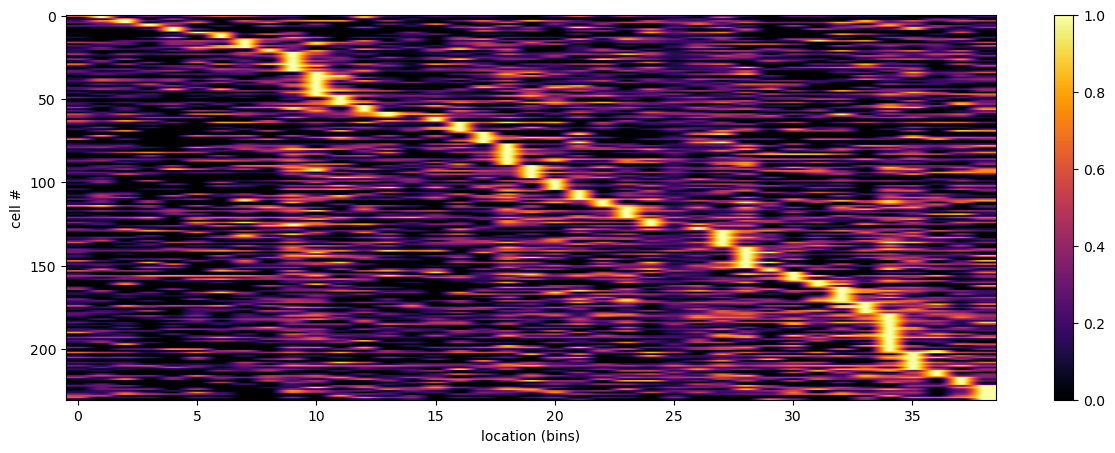

In [449]:
# normalized
normalized_ratemaps, occupancy = rm.compute_normalised_firing_rate_maps(spike_positions, norm_pos)

save_folder = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\plots\ratemaps")
rm.plot_tuning_curves(normalized_ratemaps, selected_data_session, subset, onset_col, save_folder)
#np.max(normalized_ratemaps,axis=1) # check if normalized

*Spatial information and histogram of spatial info*

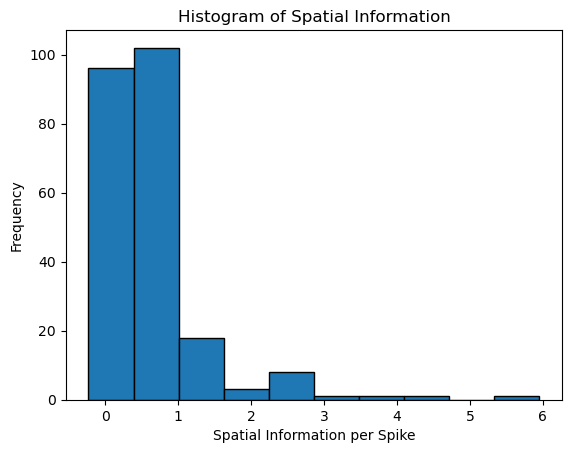

In [450]:
spatial_info = rm.calculate_spatial_info(firing_rate_maps, occupancy)

save_folder = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\plots\spatial_information_histograms")
rm.plot_spatial_info(spatial_info, selected_data_session, subset, onset_col, save_folder)